<a href="https://colab.research.google.com/github/ArturBorisov01/Algoritm-Brandes/blob/master/Borisov_Boosting_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Загрузка данных


google_drive_url = 'https://drive.google.com/uc?export=download&id=1-ChwIc-lnh7ikN4qw6Wv0UpEdNhSueVa'
df = pd.read_csv(google_drive_url)

# Очистка данных
df = df.dropna()

# Преобразование категориального признака
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# разделение датасета на признаковый и целевой
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Стандартизация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# ----- 1. Линейная регрессия -----
print("\nЛинейная регрессия:")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
# округление отрицательных предсказаний до нуля
y_pred_lr_non_negative = np.maximum(0, y_pred_lr)
print(f"R²: {r2_score(y_test, y_pred_lr_non_negative):.2f}")

# ----- 2.1 Адаптивный бустинг (AdaBoost) -----
print("\nAdaBoost:")
abr = AdaBoostRegressor(n_estimators=100, random_state=42)
abr.fit(X_train, y_train)
y_pred_ada = abr.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred_ada):.2f}")

# ----- 2.2 Gradient Boosting (sklearn) -----
print("\nGradient Boosting (sklearn):")
gbm = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred_gbm):.2f}")

# ----- 2.3 XGBoost -----
print("\nXGBoost:")
xgbr = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)
print(f"R²: {r2_score(y_test, y_pred_xgb):.2f}")


Линейная регрессия:
R²: 0.65

AdaBoost:
R²: 0.40

Gradient Boosting (sklearn):
R²: 0.77

XGBoost:
R²: 0.83


In [ ]:
# # ----- 3. TensorFlow (нейронная сеть) -----
# print("\nTensorFlow:")
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1)
# ])
# model.compile(optimizer='adam', loss='mse')

# # Обучение модели
# model.fit(X_train, y_train, validation_split=0.2, epochs=50, verbose=0)

# # Оценка
# y_pred_nn = model.predict(X_test).flatten()
# # print(f"MSE: {mean_squared_error(y_test, y_pred_nn):.2f}")
# print(f"R²: {r2_score(y_test, y_pred_nn):.2f}")


TensorFlow:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

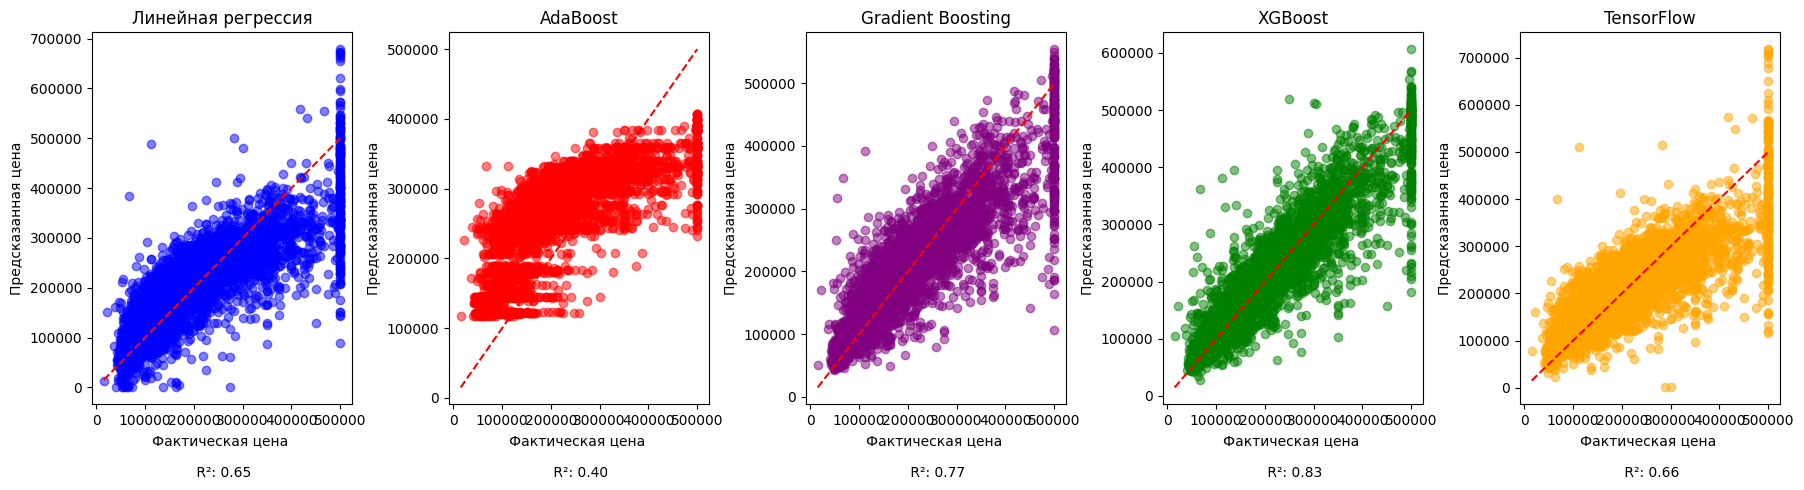

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- 1. Сравнение предсказанных и фактических значений -----
plt.figure(figsize=(18, 5))

# Линейная регрессия
plt.subplot(1, 5, 1)
plt.scatter(y_test, y_pred_lr_non_negative, alpha=0.5, color='blue')
plt.title("Линейная регрессия")
plt.xlabel(f"Фактическая цена \n\n R²: {r2_score(y_test, y_pred_lr_non_negative):.2f}")
plt.ylabel("Предсказанная цена")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# AdaBoost
plt.subplot(1, 5, 2)
plt.scatter(y_test, y_pred_ada, alpha=0.5, color='red')
plt.title("AdaBoost")
plt.xlabel(f"Фактическая цена \n\n R²: {r2_score(y_test, y_pred_ada):.2f}")
plt.ylabel("Предсказанная цена")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# Gradient Boosting (sklearn)
plt.subplot(1, 5, 3)
plt.scatter(y_test, y_pred_gbm, alpha=0.5, color='purple')
plt.title("Gradient Boosting")
plt.xlabel(f"Фактическая цена \n\n R²: {r2_score(y_test, y_pred_gbm):.2f}")
plt.ylabel("Предсказанная цена")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

# XGBoost
plt.subplot(1, 5, 4)
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
plt.title("XGBoost")
plt.xlabel(f"Фактическая цена \n\n R²: {r2_score(y_test, y_pred_xgb):.2f}")
plt.ylabel("Предсказанная цена")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')


# TensorFlow
plt.subplot(1, 5, 5)
plt.scatter(y_test, y_pred_nn, alpha=0.5, color='orange')
plt.title("TensorFlow")
plt.xlabel(f"Фактическая цена \n\n R²: {r2_score(y_test, y_pred_nn):.2f}")
plt.ylabel("Предсказанная цена")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()

# # ----- 2. Географическая карта цен -----
# plt.figure(figsize=(10, 6))
# plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='viridis', s=5)
# plt.colorbar(label='Цена жилья')
# plt.xlabel('Долгота')
# plt.ylabel('Широта')
# plt.title('Географическое распределение цен на жилье')
# plt.grid(True)
# plt.show()

# # ----- 3. Корреляционная тепловая карта -----
# plt.figure(figsize=(12, 8))
# sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
# plt.title('Корреляционная тепловая карта признаков')
# plt.show()
